# Structured Output in LangChain
Structured output in LangChain means making the language model return responses in a fixed format (like JSON), instead of plain text. This is useful when you want predictable and machine-readable results.

LangChain allows this using tools like:

* **TypedDict** or **Pydantic**: To define the expected structure.
* **with\_structured\_output()**: To bind the schema with the model and ensure the output follows it.

This helps in:

* Reducing errors from free-form text
* Making it easier to use LLM responses in apps
* Ensuring consistent and validated outputs


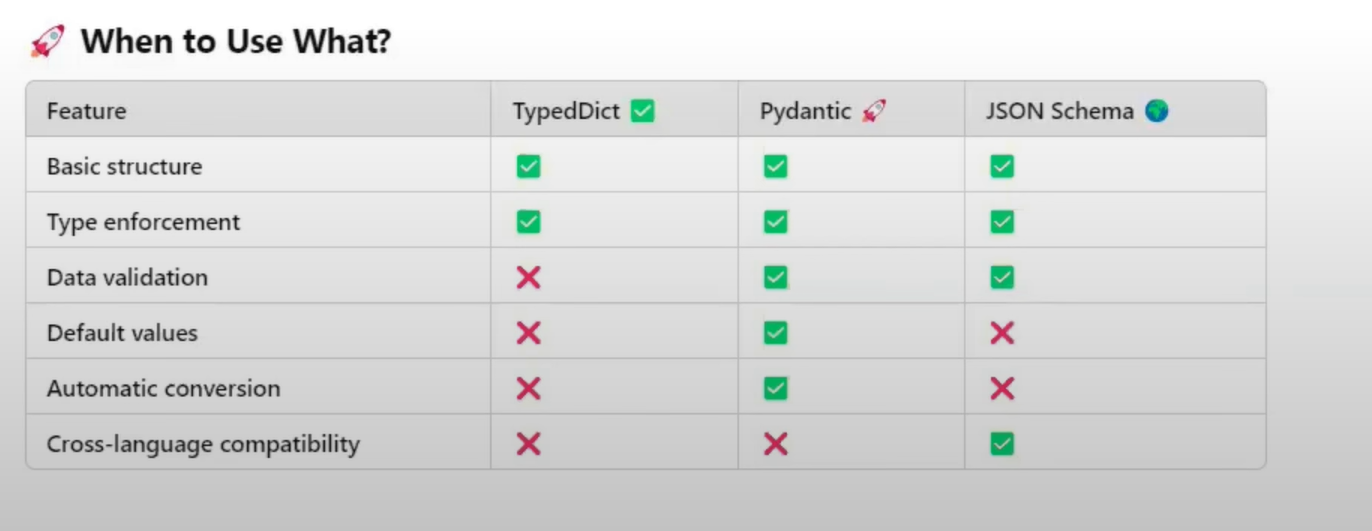

# <center>1. Simple TypedDict </center>

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
api_key = os.environ['GEMINI_API_KEY']

In [4]:
model = ChatGoogleGenerativeAI(
    api_key=api_key,
    model = 'gemini-2.0-flash',
    temperature=0.7,
    timeout=30,
    verbose=True,
)

In [19]:
class Review(TypedDict):
    summary: str
    sentiment: str

In [6]:
structured_model = model.with_structured_output(Review)

In [7]:
structured_model

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), timeout=30.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000026E7B891450>, default_metadata=(), model_kwargs={}), kwargs={'tools': [{'type': 'function', 'function': {'name': 'Review', 'description': "dict() -> new empty dictionary\ndict(mapping) -> new dictionary initialized from a mapping object's\n    (key, value) pairs\ndict(iterable) -> new dictionary initialized as if via:\n    d = {}\n    for k, v in iterable:\n        d[k] = v\ndict(**kwargs) -> new dictionary initialized with the name=value pairs\n    in the keyword argument list.  For example:  dict(one=1, two=2)", 'parameters': {'type': 'object', 'properties': {'summary': {'type': 'string'}, 'sentiment': {'type': 'string'}}, 'required': ['summary', 'sentiment']}}}], 'ls_structured_output_format': {'kwargs': {'method': 'function_calling'},

In [8]:
result = structured_model.invoke(
    """
    The hardware is great, but the software feels bloated. There are too many pre-installed apps that I can't remove. Also, the UI looks outdated compared to other brands. Hoping for a software update to fix this.
    """
)

In [10]:
result

{'sentiment': 'negative',
 'summary': 'Software feels bloated and UI looks outdated.'}

In [11]:
print(type(result))

<class 'dict'>


In [12]:
print(result['sentiment'])

negative


In [13]:
print(result['summary'])

Software feels bloated and UI looks outdated.


# <center>2. Annoted TypeDict </center>

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [15]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
from typing import TypedDict, Annotated, Optional

In [17]:
api_key = os.environ['GEMINI_API_KEY']

In [18]:
model = ChatGoogleGenerativeAI(
    api_key=api_key,
    model='gemini-2.0-flash',
    temperature=0.7,
    timeout=30,
    verbose=True,
    response_mime_type="application/json",
)

In [21]:
class Review(TypedDict):
    key_themes: Annotated[list[str], "Write down all the key themes discussed in the review in a list"] 
    summary: Annotated[str, "A brief Summary of the review"]
    sentiment: Annotated[str, "Return sentiment of the review either negative, positive or neutral"]
    pros: Annotated[Optional[list[str]], "Write down all the pros inside a list"]
    cons: Annotated[Optional[list[str]], "Write down all the cons inside a list"]
    

In [23]:
structured_model = model.with_structured_output(Review, method='json_mode')

In [24]:
structured_model

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), timeout=30.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000026E7E4EDC30>, default_metadata=(), response_mime_type='application/json', model_kwargs={}), kwargs={'response_mime_type': 'application/json', 'response_schema': {'title': 'Review', 'description': "dict() -> new empty dictionary\ndict(mapping) -> new dictionary initialized from a mapping object's\n    (key, value) pairs\ndict(iterable) -> new dictionary initialized as if via:\n    d = {}\n    for k, v in iterable:\n        d[k] = v\ndict(**kwargs) -> new dictionary initialized with the name=value pairs\n    in the keyword argument list.  For example:  dict(one=1, two=2)", 'type': 'object', 'properties': {'key_themes': {'default': 'Write down all the key themes discussed in the review in a list', 'type': 'array', 'items': {'type': 'string'}

In [25]:
result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don’t use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The \$1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful

Cons:
Bulky and heavy—not great for one-handed use
Bloatware still exists in One UI
Expensive compared to competitors

""")

Key 'title' is not supported in schema, ignoring


In [26]:
result

{'pros': ['Insanely powerful processor (great for gaming and productivity)',
  'Stunning 200MP camera with incredible zoom capabilities',
  'Long battery life with fast charging',
  'S-Pen support is unique and useful'],
 'summary': 'The Samsung Galaxy S24 Ultra is a powerful phone with a great camera, long battery life, and S-Pen support. However, it is bulky, has bloatware, and is expensive.'}

---

---

# Pydantic in LangChain (Structured Output)

Pydantic is a Python library used to define and validate data structures using classes. In LangChain, Pydantic is used to define the structure of the expected output from a language model.

In [30]:
from pydantic import BaseModel, Field
from typing import Optional

In [31]:
class Student(BaseModel):
    name: str = "Mohit"
    age: Optional[int] = None
    email: Optional[str]
    cgpa: float = Field(gt=0, lt=10, default=7, description="A decimal value, showing the CGPA of the student")
    

In [32]:
Student

__main__.Student

In [34]:
student1 = {"name": "Mohit Kumhar", "age": 10, "email": 'mohitmolela@gmail.com', "cgpa": 7.9}

In [35]:
student1

{'name': 'Mohit Kumhar',
 'age': 10,
 'email': 'mohitmolela@gmail.com',
 'cgpa': 7.9}

In [36]:
student = Student(**student1)

In [37]:
student

Student(name='Mohit Kumhar', age=10, email='mohitmolela@gmail.com', cgpa=7.9)

In [39]:
student2 = {"email": 'mohitmolela@gmail.com', "cgpa": 7.9}

In [40]:
student = Student(**student2)

In [41]:
student

Student(name='Mohit', age=None, email='mohitmolela@gmail.com', cgpa=7.9)

In [42]:
# converting dict
student.model_dump()

{'name': 'Mohit', 'age': None, 'email': 'mohitmolela@gmail.com', 'cgpa': 7.9}

In [43]:
# converting json
student.model_dump_json()

'{"name":"Mohit","age":null,"email":"mohitmolela@gmail.com","cgpa":7.9}'

# Using Pydantic instead of TypedDict

In [44]:
from pydantic import BaseModel, Field
from typing import Optional, Literal

In [45]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [46]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [47]:
api_key = os.environ['GEMINI_API_KEY']

In [48]:
model = ChatGoogleGenerativeAI(
    api_key=api_key,
    model='gemini-2.0-flash',
    temperature=0.7,
    timeout=30,
    verbose=True,
    response_mime_type="application/json",
)

In [49]:
class Review(BaseModel):
    key_themes : list[str] = Field(description="Write down all the key themes discussed in the review in a list")
    summary: str = Field(description="A brief Summary of the review")
    sentiment: Literal['pos', 'neg'] = Field(description="Return Sentiment of the review either negative, positive or neutral")
    pros: Optional[list[str]] = Field(default=None, description="Write down all the pros inside a list")
    cons: Optional[list[str]] = Field(default=None, description="Write down all the cons inside a list")
    name: Optional[str] = Field(default=None, description="Write the name of Reviewer")

In [50]:
structured_model = model.with_structured_output(Review, method='json_mode')

In [51]:
structured_model

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), timeout=30.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x0000026E7FAC3910>, default_metadata=(), response_mime_type='application/json', model_kwargs={}), kwargs={'response_mime_type': 'application/json', 'response_schema': {'properties': {'key_themes': {'description': 'Write down all the key themes discussed in the review in a list', 'items': {'type': 'string'}, 'title': 'Key Themes', 'type': 'array'}, 'summary': {'description': 'A brief Summary of the review', 'title': 'Summary', 'type': 'string'}, 'sentiment': {'description': 'Return Sentiment of the review either negative, positive or neutral', 'enum': ['pos', 'neg'], 'title': 'Sentiment', 'type': 'string'}, 'pros': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': None, 'description': 'Write down all the pr

In [69]:
result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don’t use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The \$1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful

Cons:
Bulky and heavy—not great for one-handed use
Bloatware still exists in One UI
Expensive compared to competitors

By Mohit Kumhar

""")

Key 'title' is not supported in schema, ignoring


In [70]:
result

Review(key_themes=['Performance', 'Camera', 'Battery Life', 'Design', 'Software', 'Price'], summary="Mohit Kumhar reviews the Samsung Galaxy S24 Ultra, highlighting its powerful processor, stunning camera, and long battery life. He also mentions the S-Pen support as a unique feature. However, he notes the phone's bulkiness, bloatware, and high price as drawbacks.", sentiment='pos', pros=['Insanely powerful processor (great for gaming and productivity)', 'Stunning 200MP camera with incredible zoom capabilities', 'Long battery life with fast charging', 'S-Pen support is unique and useful'], cons=['Bulky and heavy—not great for one-handed use', 'Bloatware still exists in One UI', 'Expensive compared to competitors'], name='Mohit Kumhar')

In [71]:
result.model_dump_json()

'{"key_themes":["Performance","Camera","Battery Life","Design","Software","Price"],"summary":"Mohit Kumhar reviews the Samsung Galaxy S24 Ultra, highlighting its powerful processor, stunning camera, and long battery life. He also mentions the S-Pen support as a unique feature. However, he notes the phone\'s bulkiness, bloatware, and high price as drawbacks.","sentiment":"pos","pros":["Insanely powerful processor (great for gaming and productivity)","Stunning 200MP camera with incredible zoom capabilities","Long battery life with fast charging","S-Pen support is unique and useful"],"cons":["Bulky and heavy—not great for one-handed use","Bloatware still exists in One UI","Expensive compared to competitors"],"name":"Mohit Kumhar"}'

In [72]:
result.model_dump()

{'key_themes': ['Performance',
  'Camera',
  'Battery Life',
  'Design',
  'Software',
  'Price'],
 'summary': "Mohit Kumhar reviews the Samsung Galaxy S24 Ultra, highlighting its powerful processor, stunning camera, and long battery life. He also mentions the S-Pen support as a unique feature. However, he notes the phone's bulkiness, bloatware, and high price as drawbacks.",
 'sentiment': 'pos',
 'pros': ['Insanely powerful processor (great for gaming and productivity)',
  'Stunning 200MP camera with incredible zoom capabilities',
  'Long battery life with fast charging',
  'S-Pen support is unique and useful'],
 'cons': ['Bulky and heavy—not great for one-handed use',
  'Bloatware still exists in One UI',
  'Expensive compared to competitors'],
 'name': 'Mohit Kumhar'}